<a href="https://colab.research.google.com/github/hamzaaliamjad/FinalYearProject/blob/main/NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import numpy.ma as ma
from numpy import genfromtxt
from collections import defaultdict
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import tabulate
#from recsysNN_utils import *
pd.set_option("display.precision", 1)
import matplotlib.pyplot as plt
from scipy import stats
from tensorflow.keras.models import Model


In [3]:
from sklearn.metrics.pairwise import cosine_similarity

In [5]:
students = pd.read_excel('/content/FinalData.xlsx')
studentsTest=pd.read_excel('/content/testStudent.xlsx')
students

,id,rollNo,name,semester,cgpa,webLabNum,webNum,algoNum,dbLabNum,dbNum,...,C++,JAVA,PYTHON,HTML,CSS,FLASK,JAVASCRIPT,GO,MERN,ROR
0,11,bcsf20a004,M Tayyab,7,2.8,72,68,80,70,70,...,8,0,5,7,8,0,7,0,5,0
1,11,bcsf20a004,M Tayyab,7,2.8,72,68,80,70,70,...,8,0,5,7,8,0,7,0,5,0
2,11,bcsf20a004,M Tayyab,7,2.8,72,68,80,70,70,...,8,0,5,7,8,0,7,0,5,0
3,11,bcsf20a004,M Tayyab,7,2.8,72,68,80,70,70,...,8,0,5,7,8,0,7,0,5,0
4,11,bcsf20a004,M Tayyab,7,2.8,72,68,80,70,70,...,8,0,5,7,8,0,7,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,50,Bsef20a052,Mian Hasham Ahmad,7,2.4,58,54,64,62,75,...,5,0,5,7,5,5,0,0,0,0
1996,50,Bsef20a052,Mian Hasham Ahmad,7,2.4,58,54,64,62,75,...,5,0,5,7,5,5,0,0,0,0
1997,50,Bsef20a052,Mian Hasham Ahmad,7,2.4,58,54,64,62,75,...,5,0,5,7,5,5,0,0,0,0
1998,50,Bsef20a052,Mian Hasham Ahmad,7,2.4,58,54,64,62,75,...,5,0,5,7,5,5,0,0,0,0


In [ ]:
#students_skills = pd.read_csv('/content/SKILLS.csv')
#students_skills

In [ ]:
#scaler = MinMaxScaler()
#dataScaled_Marks = scaler.fit_transform(students[['cgpa	','algoNum', 'oopNum', 'oopLabNum','webNum','webLabNum','dbNum','dbLabNum','dsaNum','dsaLabNum','itcNum','pfNum','pfLabNum']])
#dataScaled_Marks

In [6]:
students.columns

Index(['id', 'rollNo', 'name', 'semester', 'cgpa', 'webLabNum', 'webNum',
       'algoNum', 'dbLabNum', 'dbNum', 'dsaLabNum', 'dsaNum', 'interNum',
       'itcNum', 'matricNum', 'oopLabNum', 'oopNum', 'pfLabNum', 'pfNum',
       'C++', 'JAVA', 'PYTHON', 'HTML', 'CSS', 'FLASK', 'JAVASCRIPT', 'GO',
       'MERN', 'ROR'],
      dtype='object')

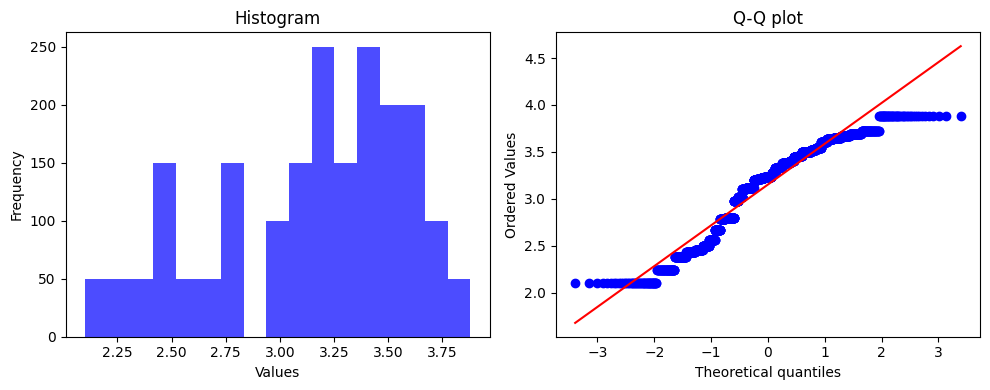

In [7]:
# Deciding which scaling method to use
plt.figure(figsize=(10, 4))

# Histogram
plt.subplot(1, 2, 1)
plt.hist(students['cgpa'], bins='auto', alpha=0.7, color='b')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram')

# Q-Q plot
plt.subplot(1, 2, 2)
stats.probplot(students['cgpa'], dist="norm", plot=plt)
plt.title('Q-Q plot')

plt.tight_layout()
plt.show()

In [8]:
# Shapiro-Wilk test
_, p_value = stats.shapiro(students['oopLabNum'])
alpha = 0.05  # Significance level

if p_value > alpha:
    print("Data is normally distributed (fail to reject H0)")
else:
    print("Data is not normally distributed (reject H0)")


Data is not normally distributed (reject H0)


In [9]:
# Shapiro-Wilk test
_, p_value = stats.shapiro(students['HTML'])
alpha = 0.05  # Significance level

if p_value > alpha:
    print("Data is normally distributed (fail to reject H0)")
else:
    print("Data is not normally distributed (reject H0)")

Data is not normally distributed (reject H0)


In [10]:
data= pd.DataFrame()
data[['cgpa']]=students[['cgpa']]*2.5
data[['algoNum', 'oopNum', 'oopLabNum','webNum','webLabNum','dbNum','dbLabNum','dsaNum','dsaLabNum','itcNum','pfNum','pfLabNum']]=students[['algoNum', 'oopNum', 'oopLabNum','webNum','webLabNum','dbNum','dbLabNum','dsaNum','dsaLabNum','itcNum','pfNum','pfLabNum']]/10
data[['JAVA','FLASK','GO','C++','PYTHON','ROR','MERN','JAVASCRIPT','HTML','CSS']]=students[['JAVA','FLASK','GO','C++','PYTHON','ROR','MERN','JAVASCRIPT','HTML','CSS']]
column_names=['cgpa','algoNum', 'oopNum', 'oopLabNum','webNum','webLabNum','dbNum','dbLabNum','dsaNum','dsaLabNum','itcNum','pfNum','pfLabNum','JAVA','FLASK','GO','C++','PYTHON','ROR','MERN','JAVASCRIPT','HTML','CSS']
data['averageRatingStudent'] = data[column_names].mean(axis=1)
data

,cgpa,algoNum,oopNum,oopLabNum,webNum,webLabNum,dbNum,dbLabNum,dsaNum,dsaLabNum,...,FLASK,GO,C++,PYTHON,ROR,MERN,JAVASCRIPT,HTML,CSS,averageRatingStudent
0,7.0,8.0,5.0,7.0,6.8,7.2,7.0,7.0,5.8,7.0,...,0,0,8,5,0,5,7,7,8,5.7
1,7.0,8.0,5.0,7.0,6.8,7.2,7.0,7.0,5.8,7.0,...,0,0,8,5,0,5,7,7,8,5.7
2,7.0,8.0,5.0,7.0,6.8,7.2,7.0,7.0,5.8,7.0,...,0,0,8,5,0,5,7,7,8,5.7
3,7.0,8.0,5.0,7.0,6.8,7.2,7.0,7.0,5.8,7.0,...,0,0,8,5,0,5,7,7,8,5.7
4,7.0,8.0,5.0,7.0,6.8,7.2,7.0,7.0,5.8,7.0,...,0,0,8,5,0,5,7,7,8,5.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,5.9,6.4,6.7,6.3,5.4,5.8,7.5,6.2,6.1,6.4,...,5,0,5,5,0,0,0,7,5,4.7
1996,5.9,6.4,6.7,6.3,5.4,5.8,7.5,6.2,6.1,6.4,...,5,0,5,5,0,0,0,7,5,4.7
1997,5.9,6.4,6.7,6.3,5.4,5.8,7.5,6.2,6.1,6.4,...,5,0,5,5,0,0,0,7,5,4.7
1998,5.9,6.4,6.7,6.3,5.4,5.8,7.5,6.2,6.1,6.4,...,5,0,5,5,0,0,0,7,5,4.7


In [11]:
dataTest= pd.DataFrame()
dataTest[['cgpa']]=studentsTest[['cgpa']]*2.5
dataTest[['algoNum', 'oopNum', 'oopLabNum','webNum','webLabNum','dbNum','dbLabNum','dsaNum','dsaLabNum','itcNum','pfNum','pfLabNum']]=studentsTest[['algoNum', 'oopNum', 'oopLabNum','webNum','webLabNum','dbNum','dbLabNum','dsaNum','dsaLabNum','itcNum','pfNum','pfLabNum']]/10
dataTest[['JAVA','FLASK','GO','C++','PYTHON','ROR','MERN','JAVASCRIPT','HTML','CSS']]=studentsTest[['JAVA','FLASK','GO','C++','PYTHON','ROR','MERN','JAVASCRIPT','HTML','CSS']]
column_namesTest=['cgpa','algoNum', 'oopNum', 'oopLabNum','webNum','webLabNum','dbNum','dbLabNum','dsaNum','dsaLabNum','itcNum','pfNum','pfLabNum','JAVA','FLASK','GO','C++','PYTHON','ROR','MERN','JAVASCRIPT','HTML','CSS']
dataTest['averageRatingStudent'] = dataTest[column_namesTest].mean(axis=1)
dataTest

,cgpa,algoNum,oopNum,oopLabNum,webNum,webLabNum,dbNum,dbLabNum,dsaNum,dsaLabNum,...,FLASK,GO,C++,PYTHON,ROR,MERN,JAVASCRIPT,HTML,CSS,averageRatingStudent
0,7.5,7.0,9.2,8.2,7.8,7.6,7.1,7.2,6.6,6.2,...,7,0,7,6,0,1,3,7,6,5.8
1,7.5,7.0,9.2,8.2,7.8,7.6,7.1,7.2,6.6,6.2,...,7,0,7,6,0,1,3,7,6,5.8
2,7.5,7.0,9.2,8.2,7.8,7.6,7.1,7.2,6.6,6.2,...,7,0,7,6,0,1,3,7,6,5.8
3,7.5,7.0,9.2,8.2,7.8,7.6,7.1,7.2,6.6,6.2,...,7,0,7,6,0,1,3,7,6,5.8
4,7.5,7.0,9.2,8.2,7.8,7.6,7.1,7.2,6.6,6.2,...,7,0,7,6,0,1,3,7,6,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,9.0,8.2,8.3,8.7,8.7,8.2,7.6,8.5,7.2,6.8,...,0,0,8,7,0,6,7,9,8,6.9
496,9.0,8.2,8.3,8.7,8.7,8.2,7.6,8.5,7.2,6.8,...,0,0,8,7,0,6,7,9,8,6.9
497,9.0,8.2,8.3,8.7,8.7,8.2,7.6,8.5,7.2,6.8,...,0,0,8,7,0,6,7,9,8,6.9
498,9.0,8.2,8.3,8.7,8.7,8.2,7.6,8.5,7.2,6.8,...,0,0,8,7,0,6,7,9,8,6.9


In [13]:
#As Data is not Normally Distributed I'll use MinMaxScaler()
scaler = MinMaxScaler()
dataScaled = scaler.fit_transform(data)
dataScaled

array([[0.39325843, 0.85106383, 0.        , ..., 0.5       , 1.        ,
        0.49601064],
       [0.39325843, 0.85106383, 0.        , ..., 0.5       , 1.        ,
        0.49601064],
       [0.39325843, 0.85106383, 0.        , ..., 0.5       , 1.        ,
        0.49601064],
       ...,
       [0.15730337, 0.68085106, 0.38636364, ..., 0.5       , 0.625     ,
        0.1974734 ],
       [0.15730337, 0.68085106, 0.38636364, ..., 0.5       , 0.625     ,
        0.1974734 ],
       [0.15730337, 0.68085106, 0.38636364, ..., 0.5       , 0.625     ,
        0.1974734 ]])

In [12]:
#As Data is not Normally Distributed I'll use MinMaxScaler()
scaler = MinMaxScaler()
dataScaledTest = scaler.fit_transform(dataTest)
dataScaledTest

array([[0.44776119, 0.2173913 , 1.        , ..., 0.33333333, 0.5       ,
        0.16281513],
       [0.44776119, 0.2173913 , 1.        , ..., 0.33333333, 0.5       ,
        0.16281513],
       [0.44776119, 0.2173913 , 1.        , ..., 0.33333333, 0.5       ,
        0.16281513],
       ...,
       [0.89552239, 0.73913043, 0.76923077, ..., 1.        , 1.        ,
        0.69852941],
       [0.89552239, 0.73913043, 0.76923077, ..., 1.        , 1.        ,
        0.69852941],
       [0.89552239, 0.73913043, 0.76923077, ..., 1.        , 1.        ,
        0.69852941]])

In [23]:
dataNormalized = pd.DataFrame(dataScaled, columns=['averageRatingStudent','cgpa','algoNum', 'oopNum', 'oopLabNum','webNum','webLabNum','dbNum','dbLabNum','dsaNum','dsaLabNum','itcNum','pfNum','pfLabNum','JAVA','FLASK','GO','C++','PYTHON','ROR','MERN','JAVASCRIPT','HTML','CSS'])
dataNormalized

,averageRatingStudent,cgpa,algoNum,oopNum,oopLabNum,webNum,webLabNum,dbNum,dbLabNum,dsaNum,...,JAVA,FLASK,GO,C++,PYTHON,ROR,MERN,JAVASCRIPT,HTML,CSS
0,0.4,0.9,0.0,0.3,3.8e-01,0.5,0.4,0.5,0.2,0.6,...,0.0,0.0,1.0,0.6,0.0,0.6,0.8,0.5,1.0,0.5
1,0.4,0.9,0.0,0.3,3.8e-01,0.5,0.4,0.5,0.2,0.6,...,0.0,0.0,1.0,0.6,0.0,0.6,0.8,0.5,1.0,0.5
2,0.4,0.9,0.0,0.3,3.8e-01,0.5,0.4,0.5,0.2,0.6,...,0.0,0.0,1.0,0.6,0.0,0.6,0.8,0.5,1.0,0.5
3,0.4,0.9,0.0,0.3,3.8e-01,0.5,0.4,0.5,0.2,0.6,...,0.0,0.0,1.0,0.6,0.0,0.6,0.8,0.5,1.0,0.5
4,0.4,0.9,0.0,0.3,3.8e-01,0.5,0.4,0.5,0.2,0.6,...,0.0,0.0,1.0,0.6,0.0,0.6,0.8,0.5,1.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.2,0.7,0.4,0.1,8.5e-02,0.1,0.5,0.3,0.3,0.4,...,0.6,0.0,0.4,0.6,0.0,0.0,0.0,0.5,0.6,0.2
1996,0.2,0.7,0.4,0.1,8.5e-02,0.1,0.5,0.3,0.3,0.4,...,0.6,0.0,0.4,0.6,0.0,0.0,0.0,0.5,0.6,0.2
1997,0.2,0.7,0.4,0.1,8.5e-02,0.1,0.5,0.3,0.3,0.4,...,0.6,0.0,0.4,0.6,0.0,0.0,0.0,0.5,0.6,0.2
1998,0.2,0.7,0.4,0.1,8.5e-02,0.1,0.5,0.3,0.3,0.4,...,0.6,0.0,0.4,0.6,0.0,0.0,0.0,0.5,0.6,0.2


In [14]:
dataNormalizedTest = pd.DataFrame(dataScaledTest, columns=['averageRatingStudent','cgpa','algoNum', 'oopNum', 'oopLabNum','webNum','webLabNum','dbNum','dbLabNum','dsaNum','dsaLabNum','itcNum','pfNum','pfLabNum','JAVA','FLASK','GO','C++','PYTHON','ROR','MERN','JAVASCRIPT','HTML','CSS'])
dataNormalizedTest

,averageRatingStudent,cgpa,algoNum,oopNum,oopLabNum,webNum,webLabNum,dbNum,dbLabNum,dsaNum,...,JAVA,FLASK,GO,C++,PYTHON,ROR,MERN,JAVASCRIPT,HTML,CSS
0,0.4,0.2,1.0,0.7,0.6,0.4,0.1,0.5,0.4,0.2,...,0.8,0.0,0.5,0.0,0.0,0.1,0.4,0.3,0.5,0.2
1,0.4,0.2,1.0,0.7,0.6,0.4,0.1,0.5,0.4,0.2,...,0.8,0.0,0.5,0.0,0.0,0.1,0.4,0.3,0.5,0.2
2,0.4,0.2,1.0,0.7,0.6,0.4,0.1,0.5,0.4,0.2,...,0.8,0.0,0.5,0.0,0.0,0.1,0.4,0.3,0.5,0.2
3,0.4,0.2,1.0,0.7,0.6,0.4,0.1,0.5,0.4,0.2,...,0.8,0.0,0.5,0.0,0.0,0.1,0.4,0.3,0.5,0.2
4,0.4,0.2,1.0,0.7,0.6,0.4,0.1,0.5,0.4,0.2,...,0.8,0.0,0.5,0.0,0.0,0.1,0.4,0.3,0.5,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.9,0.7,0.8,0.9,0.9,0.6,0.4,0.8,0.5,0.3,...,0.0,0.0,1.0,0.5,0.0,0.9,0.9,1.0,1.0,0.7
496,0.9,0.7,0.8,0.9,0.9,0.6,0.4,0.8,0.5,0.3,...,0.0,0.0,1.0,0.5,0.0,0.9,0.9,1.0,1.0,0.7
497,0.9,0.7,0.8,0.9,0.9,0.6,0.4,0.8,0.5,0.3,...,0.0,0.0,1.0,0.5,0.0,0.9,0.9,1.0,1.0,0.7
498,0.9,0.7,0.8,0.9,0.9,0.6,0.4,0.8,0.5,0.3,...,0.0,0.0,1.0,0.5,0.0,0.9,0.9,1.0,1.0,0.7


In [ ]:
#scaler = MinMaxScaler()
#dataScaled_skills = scaler.fit_transform(students_skills[['JAVA','FLASK','DJANGO','GO','C++','PYTHON','ROR','.NET','C#','MERN','JAVASCRIPT']])
#dataScaled_skills

In [ ]:
#dataNormalized_skills = pd.DataFrame(dataScaled_skills, columns=['JAVA','FLASK','DJANGO','GO','C++','PYTHON','ROR','.NET','C#','MERN','JAVASCRIPT'])
#dataNormalized_skills

In [ ]:
#data=pd.concat([dataNormalized_Marks, dataNormalized_skills], axis=1)
#data

In [15]:
jobs=pd.read_excel('/content/FinalJobs.xlsx')
jobsTest=pd.read_excel('/content/testJobs.xlsx')

In [16]:
jobs

,Job,HTML,CSS,JAVA,C++,PYTHON,FLASK,JAVASCRIPT,GO,MERN,ROR
0,JAVASCRIPT,5,5,3,4,4,4,10,2,5,4
1,FLASK,4,3,2,4,8,8,1,2,4,4
2,JAVASCRIPT,5,5,3,4,4,4,9,2,5,4
3,FLASK,4,3,2,4,9,9,1,2,4,4
4,ROR,5,4,2,2,5,2,7,2,8,9
...,...,...,...,...,...,...,...,...,...,...,...
1995,MERN,5,5,2,3,2,2,7,1,10,4
1996,C++,2,2,9,9,3,2,0,3,1,1
1997,C++,2,2,8,8,3,2,0,3,1,1
1998,MERN,5,5,2,3,2,2,7,1,10,4


In [17]:
scaler = MinMaxScaler()
dataScaled_jobs = scaler.fit_transform(jobs[['JAVA','FLASK','GO','C++','PYTHON','ROR','MERN','JAVASCRIPT','HTML','CSS']])
dataScaled_jobs

array([[0.125     , 0.28571429, 0.2       , ..., 1.        , 0.375     ,
        0.42857143],
       [0.        , 0.85714286, 0.2       , ..., 0.1       , 0.25      ,
        0.14285714],
       [0.125     , 0.28571429, 0.2       , ..., 0.9       , 0.375     ,
        0.42857143],
       ...,
       [0.75      , 0.        , 0.3       , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.1       , ..., 0.7       , 0.375     ,
        0.42857143],
       [0.125     , 0.        , 0.4       , ..., 0.1       , 0.        ,
        0.        ]])

In [18]:
scaler = MinMaxScaler()
dataScaled_jobsTest = scaler.fit_transform(jobsTest[['JAVA','FLASK','GO','C++','PYTHON','ROR','MERN','JAVASCRIPT','HTML','CSS']])
dataScaled_jobsTest

array([[0.125     , 0.28571429, 0.2       , ..., 1.        , 0.375     ,
        0.42857143],
       [0.        , 0.85714286, 0.2       , ..., 0.1       , 0.25      ,
        0.14285714],
       [0.125     , 0.28571429, 0.2       , ..., 0.9       , 0.375     ,
        0.42857143],
       ...,
       [0.75      , 0.        , 0.3       , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.1       , ..., 0.7       , 0.375     ,
        0.42857143],
       [0.125     , 0.        , 0.4       , ..., 0.1       , 0.        ,
        0.        ]])

In [19]:
dataNormalized_jobs = pd.DataFrame(dataScaled_jobs, columns=['JAVA','FLASK','GO','C++','PYTHON','ROR','MERN','JAVASCRIPT','HTML','CSS'])
dataNormalized_jobs

,JAVA,FLASK,GO,C++,PYTHON,ROR,MERN,JAVASCRIPT,HTML,CSS
0,0.1,0.3,0.2,0.3,0.2,0.3,0.4,1.0,0.4,0.4
1,0.0,0.9,0.2,0.3,0.8,0.3,0.3,0.1,0.2,0.1
2,0.1,0.3,0.2,0.3,0.2,0.3,0.4,0.9,0.4,0.4
3,0.0,1.0,0.2,0.3,0.9,0.3,0.3,0.1,0.2,0.1
4,0.0,0.0,0.2,0.0,0.4,0.9,0.8,0.7,0.4,0.3
...,...,...,...,...,...,...,...,...,...,...
1995,0.0,0.0,0.1,0.1,0.0,0.3,1.0,0.7,0.4,0.4
1996,0.9,0.0,0.3,1.0,0.1,0.0,0.0,0.0,0.0,0.0
1997,0.8,0.0,0.3,0.9,0.1,0.0,0.0,0.0,0.0,0.0
1998,0.0,0.0,0.1,0.1,0.0,0.3,1.0,0.7,0.4,0.4


In [20]:
dataNormalized_jobsTest = pd.DataFrame(dataScaled_jobsTest, columns=['JAVA','FLASK','GO','C++','PYTHON','ROR','MERN','JAVASCRIPT','HTML','CSS'])
dataNormalized_jobsTest

,JAVA,FLASK,GO,C++,PYTHON,ROR,MERN,JAVASCRIPT,HTML,CSS
0,0.1,0.3,0.2,0.3,0.2,0.3,0.4,1.0,0.4,0.4
1,0.0,0.9,0.2,0.3,0.8,0.3,0.3,0.1,0.2,0.1
2,0.1,0.3,0.2,0.3,0.2,0.3,0.4,0.9,0.4,0.4
3,0.0,1.0,0.2,0.3,0.9,0.3,0.3,0.1,0.2,0.1
4,0.0,0.0,0.2,0.0,0.4,0.9,0.8,0.7,0.4,0.3
...,...,...,...,...,...,...,...,...,...,...
495,0.0,0.0,0.1,0.1,0.0,0.3,1.0,0.7,0.4,0.4
496,0.9,0.0,0.3,1.0,0.1,0.0,0.0,0.0,0.0,0.0
497,0.8,0.0,0.3,0.9,0.1,0.0,0.0,0.0,0.0,0.0
498,0.0,0.0,0.1,0.1,0.0,0.3,1.0,0.7,0.4,0.4


In [29]:
targetDataSet= pd.read_excel('/content/targetData.xlsx')
targetDataSetTest=pd.read_excel('/content/testTarget.xlsx')
scaler = MinMaxScaler()
targetDataSetArr= scaler.fit_transform(targetDataSet)
targetDataSetArrTest= scaler.fit_transform(targetDataSetTest)
targetDataSetArr

array([[0.57217872],
       [0.43281689],
       [0.55843882],
       ...,
       [0.14033026],
       [0.15210732],
       [0.1697729 ]])

In [131]:
num_outputs = 16
tf.random.set_seed(1)


jobs_NN = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(num_outputs, activation='linear'),
])
students_NN= tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(num_outputs, activation='linear'),
])


# create the jobs input and point to the base network
input_jobs = tf.keras.layers.Input(shape=(len(dataNormalized_jobs.columns)))
vm = jobs_NN(input_jobs)
vm = tf.linalg.l2_normalize(vm, axis=1)

# create the students input and point to the base network
input_students = tf.keras.layers.Input(shape=(len(dataNormalized.columns)))
vu = students_NN(input_students)
vu = tf.linalg.l2_normalize(vu, axis=1)

# compute the dot product of the two vectors vu and vm
output = tf.keras.layers.Dot(axes=1)([vm, vu])

# specify the inputs and output of the model
model = Model([input_jobs,input_students], output)

model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 10)]         0           []                               
                                                                                                  
 input_9 (InputLayer)           [(None, 24)]         0           []                               
                                                                                                  
 sequential_8 (Sequential)      (None, 16)           3312        ['input_8[0][0]']                
                                                                                                  
 sequential_9 (Sequential)      (None, 16)           4208        ['input_9[0][0]']                
                                                                                            

In [132]:
tf.random.set_seed(1)
cost_fn = tf.keras.losses.MeanSquaredError()
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt,
              loss=cost_fn)

In [133]:
tf.random.set_seed(1)
history=model.fit([dataScaled_jobs,dataScaled],targetDataSetArr,epochs=50)

Epoch 1/50
63/63 [==============================] - 1s 3ms/step - loss: 0.0227
Epoch 2/50
63/63 [==============================] - 0s 3ms/step - loss: 0.0032
Epoch 3/50
63/63 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 4/50
63/63 [==============================] - 0s 3ms/step - loss: 0.0014
Epoch 5/50
63/63 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 6/50
63/63 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 7/50
63/63 [==============================] - 0s 3ms/step - loss: 0.0010
Epoch 8/50
63/63 [==============================] - 0s 3ms/step - loss: 8.7774e-04
Epoch 9/50
63/63 [==============================] - 0s 2ms/step - loss: 8.7035e-04
Epoch 10/50
63/63 [==============================] - 0s 2ms/step - loss: 7.4979e-04
Epoch 11/50
63/63 [==============================] - 0s 2ms/step - loss: 6.2393e-04
Epoch 12/50
63/63 [==============================] - 0s 2ms/step - loss: 7.2271e-04
Epoch 13/50
63/63 [==========

In [134]:
model.evaluate([dataScaled_jobsTest,dataScaledTest],targetDataSetArrTest)

16/16 [==============================] - 0s 2ms/step - loss: 0.0345


0.03449038043618202

In [135]:
prediction= model.predict([dataScaled_jobsTest,dataScaledTest])

prediction[0]-targetDataSetArrTest[0]


16/16 [==============================] - 0s 2ms/step


array([0.12022743])

In [136]:
print(prediction[0])
print(targetDataSetArrTest[0])

[0.42043647]
[0.30020904]


In [145]:
# Set a threshold for the maximum allowable difference
threshold = 0.2

# Compare the values and create a new array
comparisonArray = np.where(abs(targetDataSetArrTest - prediction) <= threshold,1,0)
count0s = np.count_nonzero(comparisonArray== 0)
count1s = np.count_nonzero(comparisonArray == 1)
Accuracy= (count1s/len(prediction))*100
print(f"Accuracy= {Accuracy} %")

Accuracy= 58.8 %


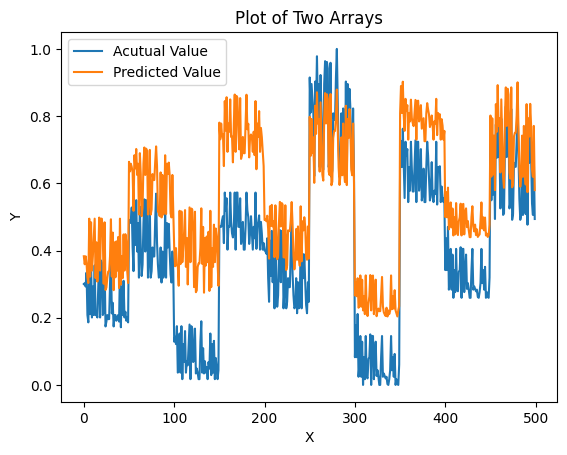

In [53]:
import numpy as np
import matplotlib.pyplot as plt
plt.plot(targetDataSetArrTest, label='Acutual Value')
plt.plot(prediction, label='Predicted Value')

# Set plot title and labels
plt.title('Plot of Two Arrays')
plt.xlabel('X')
plt.ylabel('Y')

# Add legend
plt.legend()

# Show the plot
plt.show()